In [3]:
from sympy import *
import numpy as np
import matplotlib.pyplot as pt
from mpl_toolkits.mplot3d import axes3d
import math

# Question 2

In [19]:
#question2
def f(x):
    return 8*(x[0]**2)-6*x[0]*x[1]+8*(x[1]**2)-x[0]+x[1]
def df(x):
    return np.array([16*x[0] - 6*x[1] - 1, -6*x[0] + 16*x[1] + 1])

def hes(x):
    return np.array([[16,-6],[-6,16]])

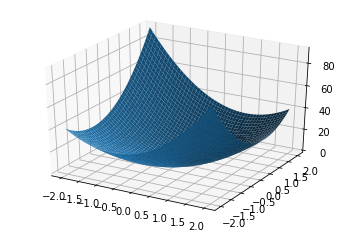

In [20]:
fig = pt.figure()
ax = fig.gca(projection="3d")

xmesh, ymesh = np.mgrid[-2:2:50j,-2:2:50j]
fmesh = f(np.array([xmesh, ymesh]))
ax.plot_surface(xmesh, ymesh, fmesh)

In [21]:
import numpy as np
from sympy import symbols, solve

def get_lambda(l,x):
    sol = solve(diff(f(x)), l)
    sol = np.array([float(re(i)) for i in sol])
    return sol[-1]

def norm(x):
    return (math.sqrt(x[0]**2+x[1]**2))

a = 10**4
c1 = 1/4
c2 = 2
guesses = [np.array([100,0])]
x = [100,0]
j = hes(x) + a*np.identity(2)
x_new = x
invj = np.linalg.inv(j) 
for i in range(6):
    print('Iteration:',i, 'x and func values:',x,f(x))
    if (f(x_new))<=(f(x)):
        a = a*c1
    else:
        a = a*c2
    j = hes(x) + a*np.identity(2)
    invj = np.linalg.inv(j) 
    s = -np.dot(invj,df(x))
    l = symbols('l')
    lamb = [-l,l]
    x_symb = x + l*s
    l_val = get_lambda(l,x_symb)
    x_new = x + l_val*s
    x = x_new
    guesses.append(x)

Iteration: 0 x and func values: [100, 0] 79900
Iteration: 1 x and func values: [19.69837646 29.91694922] 6738.725690788464
Iteration: 2 x and func values: [ 8.27455084 -0.09911698] 544.3713492035008
Iteration: 3 x and func values: [1.52697377 2.26525164] 39.68850985290973
Iteration: 4 x and func values: [ 0.48867873 -0.08131061] 1.631765794248192
Iteration: 5 x and func values: [0.07896976 0.01443228] -0.019819656438808328


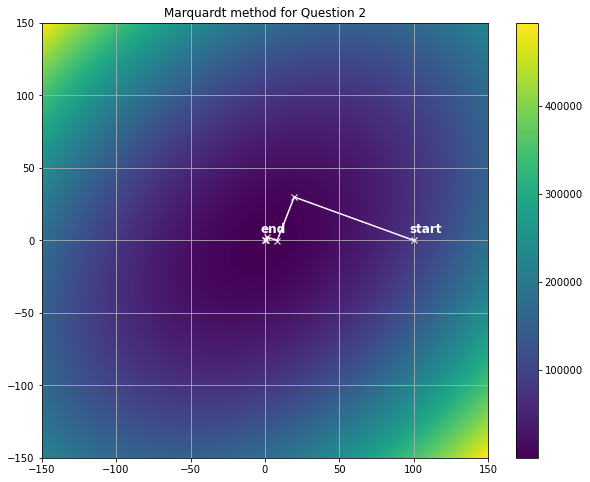

In [22]:
x = np.linspace(-150, 150, 1000)
y = np.linspace(-150, 150, 1000)
xx, yy = np.meshgrid(x, y)
fmesh = f(np.array([xx, yy]))
pt.figure(figsize=(10, 8))
pt.pcolormesh(xx, yy, fmesh)
pt.colorbar()
it_array = np.array(guesses)
pt.plot(it_array.T[0], it_array.T[1], "x-", color = 'white')
pt.text(guesses[0][0]-3, guesses[0][1]+5, 'start', color='w', fontsize=12, fontweight='bold')
pt.text(guesses[-1][0]-3, guesses[-1][1]+5, 'end', color='w', fontsize=12, fontweight='bold')
pt.title('Marquardt method for Question 2')
pt.grid()
pt.show()

# Question 3

In [23]:
#question3
def f(x):
    return 100*(x[1]-x[0]**2)**2 + (1-x[0])**2

def df(x):
    return np.array([-400*x[0]*(-x[0]**2 + x[1]) + 2*x[0] - 2, -200*x[0]**2 + 200*x[1]])

def hes(x):
    return np.array([[1200*x[0]**2 - 400*x[1] + 2, -400*x[0]],[-400*x[0], 200]])

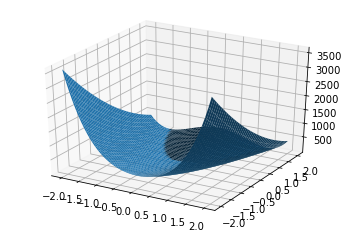

In [24]:
fig = pt.figure()
ax = fig.gca(projection="3d")

xmesh, ymesh = np.mgrid[-2:2:50j,-2:2:50j]
fmesh = f(np.array([xmesh, ymesh]))
ax.plot_surface(xmesh, ymesh, fmesh)

In [25]:
import numpy as np
from sympy import symbols, solve

def get_lambda(l,x):
    sol = solve(diff(f(x)), l)
    sol = np.array([float(re(i)) for i in sol])
    return sol[-1]

def norm(x):
    return (math.sqrt(x[0]**2+x[1]**2))

a = 10**4
c1 = 1/4
c2 = 2
guesses = [np.array([-1.2,1.0])]
x = [-1.2,1.0]
j = hes(x) + a*np.identity(2)
x_new = x
invj = np.linalg.inv(j) 
for i in range(6):
    print('Iteration:',i, 'x and func values:',x,f(x))
    if (f(x_new))<=(f(x)):
        a = a*c1
    else:
        a = a*c2
    j = hes(x) + a*np.identity(2)
    invj = np.linalg.inv(j) 
    s = -np.dot(invj,df(x))
    l = symbols('l')
    lamb = [-l,l]
    x_symb = x + l*s
    l_val = get_lambda(l,x_symb)
    x_new = x + l_val*s
    x = x_new
    guesses.append(x)

Iteration: 0 x and func values: [-1.2, 1.0] 24.199999999999996
Iteration: 1 x and func values: [1.46691525 2.1537071 ] 0.218358326896805
Iteration: 2 x and func values: [1.46649067 2.14983954] 0.217670593567452
Iteration: 3 x and func values: [-0.15852463  0.03228078] 1.3472926146359394
Iteration: 4 x and func values: [-0.28127417  0.07842188] 1.6417115700749956
Iteration: 5 x and func values: [-0.3538262   0.11705568] 1.8394669486358526


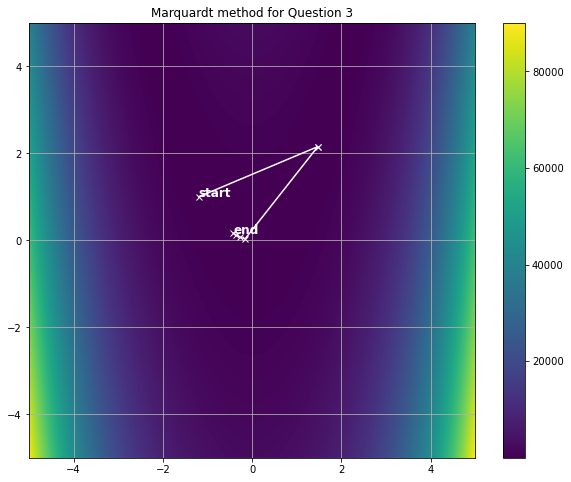

In [26]:
x = np.linspace(-5, 5, 1000)
y = np.linspace(-5, 5, 1000)
xx, yy = np.meshgrid(x, y)
fmesh = f(np.array([xx, yy]))
pt.figure(figsize=(10, 8))
pt.pcolormesh(xx, yy, fmesh)
pt.colorbar()
it_array = np.array(guesses)
pt.plot(it_array.T[0], it_array.T[1], "x-", color = 'white')
pt.text(guesses[0][0], guesses[0][1], 'start', color='w', fontsize=12, fontweight='bold')
pt.text(guesses[-1][0], guesses[-1][1], 'end', color='w', fontsize=12, fontweight='bold')
pt.title('Marquardt method for Question 3')
pt.grid()
pt.show()